### 1 - Logistic Regression

Logistic regression is analogous to multiple linear regression, except the outcome is binary. Various transformations are employed to convert the problem to one in which a linear model can be fit. Like discriminant analysis, and unlike K-Nearest Neighbor and naive Bayes, logistic regression is a structured model approach rather than a data-centric approach.<br>

The logistic regression model takes real-valued inputs and makes a prediction as to the probability of the input belonging to the default class (class 0).<br>
If the probability is > 0.5 we can take the output as a prediction for the default class (class 0), otherwise the prediction is for the other class (class 1).
<br>
<br>
**Logit** The function that maps class membership probability to a range from ± ∞
<br>
**Odds** The ratio of “success” (1) to “not success” (0).

In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, n_classes=3)

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)
print('Accuracy = ', clf.score(X, y))

Score =  0.671


With cross-validation:

In [28]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (+/-%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.756 (+/-0.032)


### 2 - K-Nearest Neighbors (KNN)

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.<br><br>
• KNN classifies a record by assigning it to the class that similar records belong to.<br>
• Similarity (distance) is determined by Euclidian distance or other related metrics.<br>
• The number of nearest neighbors to compare a record to, K, is determined by
how well the algorithm performs on training data, using different values for K.<br>
• Typically, the predictor variables are standardized so that variables of large scale
do not dominate the distance metric. Normalizing your data to the range [0, 1] is a good idea.<br>

In [47]:
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X, y)
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)

**choosing K:** if K is high we may have the risk of overfitting and if it's low we may have underfitting. Below with Grid search method we can estimate the optimal number of neighbors:


In [52]:
from sklearn.model_selection import GridSearchCV

# define model
clf = KNeighborsClassifier()

# define parameters
params = {"n_neighbors": np.arange(1,5)}

# define search
grid = GridSearchCV(estimator=clf, param_grid=params)

# perform the search
grid.fit(X,y)

# summarize
print("Accuracy = ", round(grid.best_score_,2))
print("n_neighbors = ", grid.best_estimator_.n_neighbors)

Accuracy =  0.92
n_neighbors =  3


Grid search to find suitable weight, with stratified KFold cross-validation:

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import RadiusNeighborsClassifier

# define model
# model = RadiusNeighborsClassifier(radius=0.3)
clf = KNeighborsClassifier(n_neighbors=3)

# create pipeline
pipeline = Pipeline(steps=[('norm', MinMaxScaler()),('model',clf)])

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['model__weights'] = ['uniform', 'distance']

# define search
search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.953
Config: {'model__weights': 'uniform'}


### 3 - Support Vector Machine (SVM) classification

The SVC by setting decision boundaries try to estimate the best hyperplane which fits the data and covers the majority of time-points. <br>
The advatage of SVM is its effectiveness if the number of dimensions is greater than the number of samples, also it's memory efficient, and it accepts both linear and nonlinear kernel functions, so it's versatile. <br><br>
SVM Terminology: <br>
**Kernel:** A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension. <br>
**Hyperplane:** This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output. <br>
**Decision Boundary:** A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well
<br><br>
Kernel can be any of following: linear, polynomial, rbf, sigmoid. 

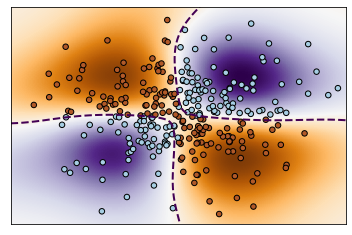

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC,SVC

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = SVC(kernel='rbf')
# clf = NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### 4 - Decision Tree classification

**Decision Trees** are one of the Machine Learning algorithms that can be used for classification and regressions tasks, and are fundamental components of Random Forests. One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all. Decision Tress classifies data based on set of rules which correspond to successive sequential partitioning of the data into sub-partitions. At each stage of partitioning, the tree algorithm chooses the partition that minimizes the outcome impurity (by calculating the ***Gini impurity*** or the ***Entropy*** of each partition) within each sub-partition. When no further partitions can be made, the tree is fully grown and each terminal node (or leaf), has records of a single class. However, a fully grown tree may have the risk of overfitting and it must be pruned back so that it captures signal and not noise. To do so, we can regularize the hyperparameter and restrict the maximum depth of the Decision Tree. Lastly, one of the popular measures used in Decision Tree is feature importance. If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves. It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest.
<br><br>
The Decision Tree algorithm version used in scikit-learn is called Classification and Regression Trees or ***CART***.
<br><br>
Terminology:
<br>**Recursive partitioning:** Repeatedly dividing and subdividing the data with the goal of making the out‐ comes in each final subdivision as homogeneous as possible.
<br>**Split value:** A predictor value that divides the records into those where that predictor is less than the split value, and those where it is more.
<br>**Node:** In the decision tree, or in the set of corresponding branching rules, a node is the graphical or rule representation of a split value.
<br>**Leaf:** The end of a set of if-then rules, or branches of a tree—the rules that bring you to that leaf provide one of the classification rules for any record in a tree.
<br>**Loss:** The number of misclassifications at a stage in the splitting process; the more los‐ ses, the more impurity.
<br>**Impurity:** The extent to which a mix of classes is found in a subpartition of the data (the more mixed, the more impure).
<br>**Pruning:** The process of taking a fully grown tree and progressively cutting its branches back to reduce overfitting.

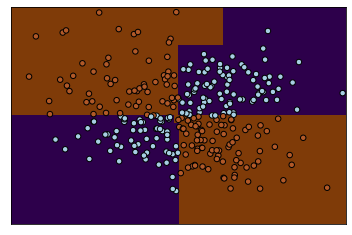

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


# fit the model
clf = DecisionTreeClassifier()
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [104]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
print('Accuracy = ' + str(accuracy_score(y, y_pred)))

Accuracy = 1.0


A fully grown tree results in completely pure leaves and, hence, 100% accuracy in classifying the data that it is trained on. This accuracy is illusory since we have overfit the data, fitting the noise in the training data, not the signal that we want to identify in new data.<br><br>
In order to avoid overfitting in example above, we can estimate the hyperparameters like ***max_depth*** and ***min_samples_split*** using **GridSearchCV**.<br>
<br>**max_depth** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
<br>**min_samples_split** The minimum number of samples required to split an internal node.


In [102]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": np.arange(3,9),
         "min_samples_split": np.arange(3,9)}

grid = GridSearchCV(estimator=clf, param_grid=params)
grid.fit(X,y)

print('Best max_depth: ', grid.best_estimator_.max_depth)
print('Best min_samples_split: ', grid.best_estimator_.min_samples_split)

Best max_depth:  7
Best min_samples_split:  3


### 5 - Random Forest classification

The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. <br><br>
There are two families of Ensemble methods:<br>
**Bagging:** or “bootstrap aggregating” is a general technique to form a collection of models by bootstrapping the data, like **Random Forest**, where the algorithm in addition to sampling the records (bagging), also samples the variables at each partition..<br>
**Boosting:** A general technique to fit a sequence of models by giving more weight to the records with large residuals for each successive round.




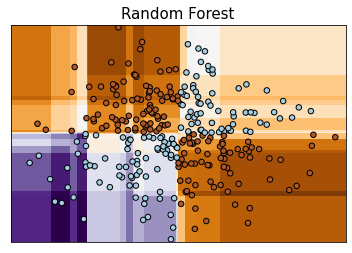

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = RandomForestClassifier(n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.title('Random Forest',fontsize=15)
plt.axis([-3, 3, -3, 3])
plt.show()

### 6 - Gradient Boosting classification

**Adaboost:** An early version of boosting that reweights the data based on the residuals.<br>
**Gradient boosting:** A more general form of boosting that is cast in terms of minimizing a cost function.<br>
**Stochastic gradient boosting:** The most general algorithm for boosting that incorporates resampling of records and columns in each round.<br>

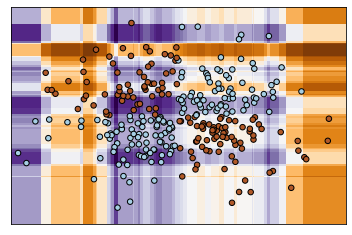

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.2, max_depth=1, subsample=.5)
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### 7 - Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
<br>The Bayesian classifier works only with categorical predictors (e.g., with spam classification, where the presence or absence of words, phrases, characters, and so on lies at the heart of the predictive task).

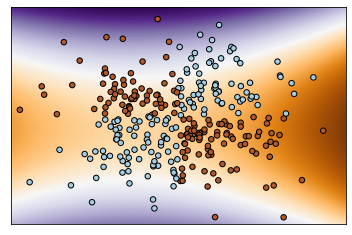

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = GaussianNB()
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## Bonus - Comparision


Accuracy 
---------
KNN: 0.98
SVC: 0.94
Random Forest: 0.94
Gradient Boosting: 0.90


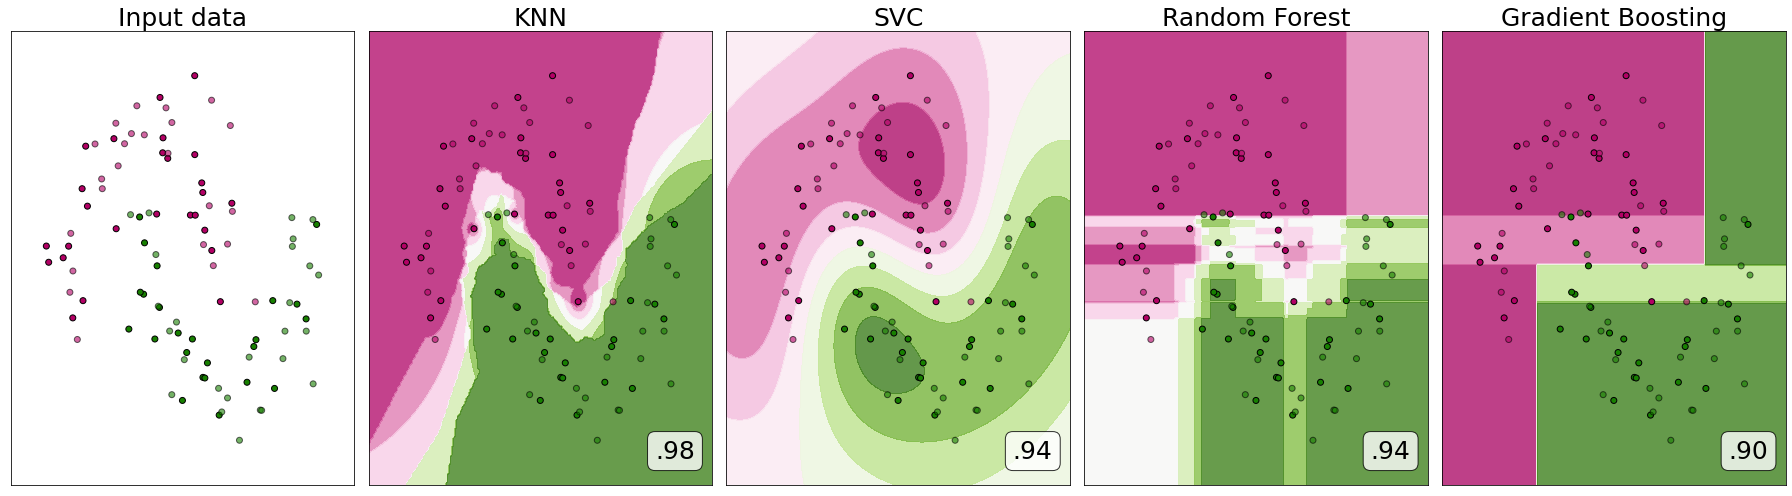

In [115]:
# Code source: Tom Dupré la Tour
# Adapted from plot_classifier_comparison by Gaël Varoquaux and Andreas Müller
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

h = .02  # step size in the mesh

classifiers = [
    
    (KNeighborsClassifier(weights='distance'), {'n_neighbors': np.arange(2, 8)}),
    (SVC(kernel='rbf',random_state=0), {'C': np.logspace(-2, 7, 10)}),
    (RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0),{'min_samples_split': np.arange(2,5)}),
    (GradientBoostingClassifier(n_estimators=50, random_state=0), {'learning_rate': np.logspace(-4, 0, 10)}),

]


names = ["KNN", "SVC", "Random Forest","Gradient Boosting"]

n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
]
fig, axes = plt.subplots(nrows=1, ncols=len(classifiers) + 1,
                         figsize=(25, 7))

cm = plt.cm.PiYG
cm_bright = ListedColormap(['#b30065', '#178000'])

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    print('\nAccuracy \n---------')

    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.5, random_state=42)

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot the dataset first
    ax = axes[0]
    ax.set_title("Input data",fontsize=25)
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in \
            enumerate(zip(names, classifiers)):
        ax = axes[est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('%s: %.2f' % (name, score))

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(' + ', '\n'),fontsize=25)
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'), size=25,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),
                transform=ax.transAxes, horizontalalignment='right')


plt.tight_layout()
plt.show()

## Classification Performance Metrics

<br>**Confusion Matrix:** a table showing the number of correct and incorrect predictions categorized by type of response. The columns of this matrix is predicted outcomes and its rows are the true outcomes. The diagonal elements show the number of correct predictions -True Positive, True Negative- and the off-diagonal elements show the number of incorrect predictions –False Positive, False Negative.
<br> 

||$$\hat{y}=1$$|$$\hat{y}=0$$||
|---|---|---|---|
|$$y=1$$| TP|FN|recall|
|$$y=0$$| FP|TN|specificity
||precision||accuracy|

<br>**Accuracy:** proportion of cases classified correctly.
<br> $$Accuracy = \frac{\sum{TP} + \sum{TN}}{n\_samples}$$
<br>**Precision:** it measures the “accuracy of positive predictions”, meaning how many of patients are truly patient.

<br> $$Precision = \frac{\sum{TP}}{\sum{TP} + \sum{FP}}$$

<br>**Recall:** also known as Sensitivity and true positive rate (TPR), measures the strength of the model to predict a positive outcome, meaning how many of patients we can find from total existing number.

<br> $$Recall = \frac{\sum{TP}}{\sum{TP} + \sum{FN}}$$

<br>**Specificity:** or true negative rate (TNR) which measures a model’s ability to predict a negative outcome, which is nearly similar to recall with the difference that here we are interested on control group instead of patient group.

<br> $$Specificity = \frac{\sum{TN}}{\sum{TN} + \sum{FP}}$$
 
<br>**F1-Score:** it combines “precision” and “recall” into single metric by their harmonic mean. Whereas the regular mean treats all values equally, the harmonic mean gives more weight to low values.  The classifier will only get a high F1 score if both recall and precision are high and it favors classifiers that have similar precision and recall. However, in reality we cannot have it both ways: increasing precision reduces recall, and vice versa. This is called the **Precision/recall tradeoff**.
<br><br>**ROC:** Similar to the precision/recall tradeoff, there is a trade-off between “specificity” and “recall”. The ideal classifier would classify patients correctly, without misclassifying controls. The metric that captures this trade-off is Receiver Operating Characteristic (ROC) curve, which similar to PR curve, but here we plot “recall (TPR)” against “1-specificity” or false positive rate (FPR). FPR is the ratio of controls that are incorrectly classified as patients.
<br><br>**AUC:** or Area Under Curve is the total area under the ROC curve. A perfect classifier will have AUC=1, and a random ineffective classifier will have AUC=0.5.
<br> If the number of each class is different (rare class problem), a better alternative metric would be **Lift Curve** (Tufféry, 2011) instead of ROC curve.

In [107]:
from sklearn import metrics

y_pred = model.predict(X_train)
y_score = model.predict_proba(X_train)[:, 1]
# y_score = model.decision_function(X_train)[:, 1]

metrics.confusion_matrix(y_true, y_pred)
metrics.accuracy_score(y_true, y_pred)
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_score)